<a href="https://colab.research.google.com/github/priya170807/Time-seriesAnalysis/blob/main/Azure_dataset_multiplefeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data_path = '/content/drive/MyDrive/vmtable.csv/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecount', 'vmmemory']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')


#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecount']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [ ]:
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [ ]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2013767
Total Number of Subscriptions in the Dataset: 5958
Total Number of Deployments in the Dataset: 35941
Total VM Hours Available in the Dataset: 104371713.416667
Total Core Hours Available in the Dataset: 237815104.750000


In [ ]:
trace_dataframe["subscriptionid"].value_counts()

+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7    128047
1pvP5oaK47WSSY0IZRNEQYdTLEx79rf7Gj1isBYW1jDOFGZXLQGTa0V3XnCrLrkB    111509
IBRuELx83WZHD8ZBmRnQ7nN53DxcMPAO7szqGt218k7STW7rx0pjgjj5eLJ0FLbn     93427
BShs5OvpbfrccmXj7X4MwSxkSFVNdSOzhYaDEKCijpvxWWkNByokK6c31F1uCT7R     85874
8aRytjOt2E+dixkPugZHbKFROou3eQLywft928DTtFP2o3QzFTIxYQ+8r0kdkzvo     68490
                                                                     ...  
0y2lONYDMM5NmL54AUh5knoBSIFTvwxGmZ0SsgyT2N+pvcCchRq11zxhHyk8V4u0         1
+w0UpkijZjYmxKoIbgsHur2tZGYVfYCvBZfxgQA3fS6AewB7fjZeP/GZ8PHqdlip         1
im8yg44Wk38XgVG8sNM/NM8kr9RAgoaG/HVi6NQ/TtsyVZ0gPa6bTeCcxFTNuSOB         1
do/4/JUwDTSoj5jVwMf4Y6fnPVlwPHMlt2wClBKScFNU6IUjYjfeoJ+TQ0jlBiXo         1
j0KcokTGYNWm3AgkSbvdp4oGsZteb/XioDN+SPe+6Af3a9HD920cU9it9yhL/m1X         1
Name: subscriptionid, Length: 5958, dtype: int64

In [ ]:
oneVM_data = trace_dataframe[trace_dataframe["subscriptionid"] == "+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7"]

In [ ]:
oneVM_data.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667


In [ ]:
len(oneVM_data)

128047

In [ ]:
oneVM_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215477,Rj0MEc2eJCMnY1lQLsCr3KlaSqZBlB8jnMRQtntC6x90TT...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,78.671207,16.454956,78.671207,Unkown,4,7.00,0.166667,0.666667
215478,zGixyP8hrPksr7LjouSurrsuvm5qyIvimPZLY1RDSXSvAC...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,2.396378,1.030316,2.396378,Delay-insensitive,8,14.00,0.083333,0.666667
215479,3vZ244xrWVCF2MD2dCRSYknxm/sKSKaF416OewRZZOXBY3...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,13.906270,2.627541,13.906270,Unkown,8,14.00,0.083333,0.666667
215480,2BpPWqTJVkBhifZ5pd2N4iV03VHHA7weOUpuGR8fNKAnu4...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,75.087022,12.464659,75.087022,Unkown,4,7.00,0.166667,0.666667


In [ ]:
oneVM_data.reset_index(drop=True, inplace=True)

In [ ]:
oneVM_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128042,Rj0MEc2eJCMnY1lQLsCr3KlaSqZBlB8jnMRQtntC6x90TT...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,78.671207,16.454956,78.671207,Unkown,4,7.00,0.166667,0.666667
128043,zGixyP8hrPksr7LjouSurrsuvm5qyIvimPZLY1RDSXSvAC...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,2.396378,1.030316,2.396378,Delay-insensitive,8,14.00,0.083333,0.666667
128044,3vZ244xrWVCF2MD2dCRSYknxm/sKSKaF416OewRZZOXBY3...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1511100,1511400,13.906270,2.627541,13.906270,Unkown,8,14.00,0.083333,0.666667
128045,2BpPWqTJVkBhifZ5pd2N4iV03VHHA7weOUpuGR8fNKAnu4...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,348600,349200,75.087022,12.464659,75.087022,Unkown,4,7.00,0.166667,0.666667


In [ ]:
yearly_data = oneVM_data.loc[0:8039]

In [ ]:
yearly_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,OTZc2y53zvg3JhthNOmD7rri2jIx6ylz/DIJT1tNugg7cZ...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,89.453653,24.363767,89.453653,Unkown,4,7.00,0.250000,1.000000
8036,tnl2xbaHNEfNpKM9Ylt4GdprJQebEUKI5EX85FG5qipIMU...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2120400,2129100,98.841736,5.960542,95.854683,Unkown,8,14.00,2.416667,19.333333
8037,taFDbwKxCHHITWK1aZR/apJfQpfgFIULfe2mlctkC2LSxk...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,70.042481,19.129137,70.042481,Unkown,4,7.00,0.250000,1.000000
8038,PAwZT/m/JA73C1YnFV1f29HgcPsxHojX2AlAdmHJSDww34...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1221000,1236900,47.881668,1.742805,6.803815,Delay-insensitive,8,14.00,4.416667,35.333333


In [ ]:
from datetime import datetime
from datetime import datetime
Timestamp = pd.date_range('2020-01-01', periods=8040, freq='H')
#bytes_df["Timestamp"] = pd.date_range(datetime(2020, 11, 15, hour=23, minute=0), periods=3945, freq='5min')

In [ ]:
time_stamp = pd.Series(Timestamp)

In [ ]:
time_stamp

0      2020-01-01 00:00:00
1      2020-01-01 01:00:00
2      2020-01-01 02:00:00
3      2020-01-01 03:00:00
4      2020-01-01 04:00:00
               ...        
8035   2020-11-30 19:00:00
8036   2020-11-30 20:00:00
8037   2020-11-30 21:00:00
8038   2020-11-30 22:00:00
8039   2020-11-30 23:00:00
Length: 8040, dtype: datetime64[ns]

In [ ]:
type(time_stamp)

pandas.core.series.Series

In [ ]:
time_stamp.value_counts(ascending=True)

2020-04-13 22:00:00    1
2020-05-18 21:00:00    1
2020-06-20 03:00:00    1
2020-11-09 09:00:00    1
2020-09-07 00:00:00    1
                      ..
2020-06-13 18:00:00    1
2020-06-13 10:00:00    1
2020-05-19 13:00:00    1
2020-03-11 16:00:00    1
2020-09-16 23:00:00    1
Length: 8040, dtype: int64

In [ ]:
useful_data = yearly_data[["maxcpu", "corehour", "lifetime"]]

In [ ]:
len(useful_data)

8040

In [ ]:
useful_data["Timestamp"] = time_stamp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
check = useful_data[useful_data["Timestamp"]=='2020-02-29 00:00:00']

In [ ]:
check

,maxcpu,corehour,lifetime,Timestamp
1416,47.843143,0.166667,0.083333,2020-02-29


In [ ]:
useful_data.columns

Index(['maxcpu', 'corehour', 'lifetime', 'Timestamp'], dtype='object')

In [ ]:
len(useful_data)

8040

In [ ]:
df = useful_data.copy()

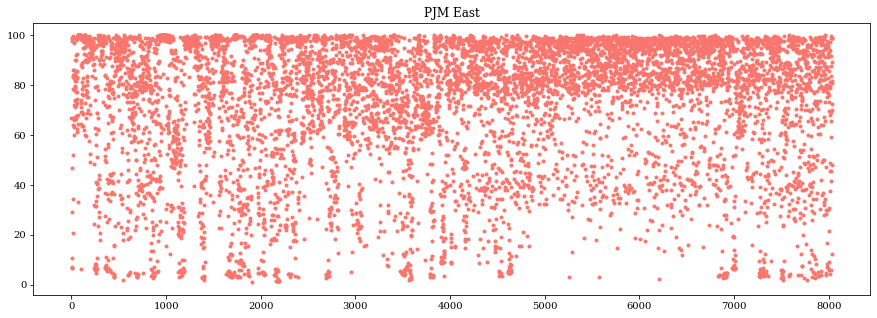

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df['maxcpu'].plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')
plt.show()

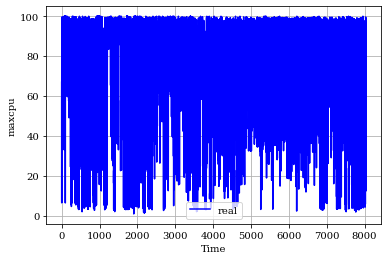

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(df['maxcpu'], "-b", label="real")
# plt.plot(y_pred, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
#plt.savefig('original.png', format='png', dpi=720)
plt.show()

In [ ]:
# eps = 0.00001
# df[columns[0:]] = (df[columns[0:]] - df[columns[0:]].min() + eps) / (
#                 df[columns[0:]].max() - df[columns[0:]].min() + eps)

In [ ]:
df.head()

,maxcpu,corehour,lifetime,Timestamp
0,66.909246,10.000000,1.250000,2020-01-01 00:00:00
1,6.510768,10.000000,1.250000,2020-01-01 01:00:00
2,66.956558,11.333333,1.416667,2020-01-01 02:00:00
3,98.795780,0.083333,0.083333,2020-01-01 03:00:00
4,6.472197,46.666667,5.833333,2020-01-01 04:00:00


In [ ]:
len(df)

8040

In [ ]:
df.columns

Index(['maxcpu', 'corehour', 'lifetime', 'Timestamp'], dtype='object')

In [ ]:
# splitting the data into train and test
split_size = 0.8
split_val = int(df.shape[0] * split_size)
#x_data = df[['maxcpu', 'corehour', 'lifetime']]
x_data = df[['maxcpu','corehour', 'lifetime']]
y_data = df[['maxcpu','corehour', 'lifetime']]
x_train = x_data[:split_val]
y_train = y_data[:split_val]
x_test = x_data[split_val:]
y_test = y_data[split_val:]


In [ ]:
print("x_train shape = {}".format(x_train.shape))
print("Y_train shape = {}".format(y_train.shape))
print("X_test shape = {}".format(x_test.shape))
print("Y_test shape = {}".format(y_test.shape))

x_train shape = (6432, 3)
Y_train shape = (6432, 3)
X_test shape = (1608, 3)
Y_test shape = (1608, 3)


In [ ]:
y_test.values.reshape(-1,1)

array([[96.760962  ],
       [14.66666667],
       [ 7.33333333],
       ...,
       [80.857566  ],
       [16.66666667],
       [ 2.08333333]])

In [ ]:
# scalers
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x_train_sc = scaler_x.fit_transform(x_train.values)
x_test_sc = scaler_x.transform(x_test.values)
y_train_sc = scaler_y.fit_transform(y_train.values)
y_test_sc = scaler_y.transform(y_test.values)


In [ ]:
print("x_train_sc shape = {}".format(x_train_sc.shape))
print("y_train_sc shape = {}".format(y_train_sc.shape))
print("x_test_sc shape = {}".format(x_test_sc.shape))
print("y_test_sc shape = {}".format(y_test_sc.shape))

x_train_sc shape = (6432, 3)
y_train_sc shape = (6432, 3)
x_test_sc shape = (1608, 3)
y_test_sc shape = (1608, 3)


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):

      v = X[i:(i + time_steps),:]
      #print(v)
      Xs.append(v)
      ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
#tf.keras.backend.clear_session()
timestep = 24
Xtrain, ytrain = create_dataset(x_train_sc, y_train_sc, timestep)
Xtest, ytest = create_dataset(x_test_sc, y_test_sc, timestep)

In [ ]:
print("Xtrain shape = {}".format(Xtrain.shape))
print("ytrain shape = {}".format(ytrain.shape))
print("Xtest shape = {}".format(Xtest.shape))
print("ytest shape = {}".format(ytest.shape))

Xtrain shape = (6408, 24, 3)
ytrain shape = (6408, 3)
Xtest shape = (1584, 24, 3)
ytest shape = (1584, 3)


In [ ]:
 #ytrain = np.expand_dims(ytrain, axis=-1)

In [ ]:
#ytrain.shape

In [ ]:
#ytest = np.expand_dims(ytest, axis=-1)

In [ ]:
#ytest.shape

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
tensorflow.get_logger().setLevel('ERROR')

tensorflow.keras.backend.clear_session()

In [ ]:
import tensorflow as tf
outsteps=24
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 3]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  #tf.keras.layers.LSTM(128),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
  #tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(3,kernel_initializer=tf.initializers.zeros),
  tf.keras.layers.Lambda(lambda x: x * 200),
  #tf.keras.layers.Reshape([24, 3])
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
#history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[lr_schedule])

In [ ]:
# import tensorflow as tf
# model = tf.keras.models.Sequential([
  
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
#   #tf.keras.layers.LSTM(128),
#   #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 200)
# ])
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
# optimizer = tf.keras.optimizers.Adam(lr=1e-8)
# model.compile(loss=tf.keras.losses.Huber(),
#               optimizer=optimizer,
#               metrics=["mse"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, None, 32)          320       
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 64)          16640     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
_________________________________________________________________
lambda_3 (Lambda)            (None, 3)                 0         
Total params: 41,987
Trainable params: 41,987
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), callbacks=[lr_schedule])

Epoch 1/100
201/201 [==============================] - 3s 17ms/step - loss: 0.0818 - mse: 0.1635 - val_loss: 0.0613 - val_mse: 0.1227
Epoch 2/100
201/201 [==============================] - 2s 11ms/step - loss: 0.0487 - mse: 0.0973 - val_loss: 0.0366 - val_mse: 0.0732
Epoch 3/100
201/201 [==============================] - 2s 11ms/step - loss: 0.0296 - mse: 0.0592 - val_loss: 0.0232 - val_mse: 0.0463
Epoch 4/100
201/201 [==============================] - 2s 12ms/step - loss: 0.0196 - mse: 0.0392 - val_loss: 0.0165 - val_mse: 0.0331
Epoch 5/100
201/201 [==============================] - 2s 11ms/step - loss: 0.0148 - mse: 0.0296 - val_loss: 0.0136 - val_mse: 0.0272
Epoch 6/100
201/201 [==============================] - 2s 12ms/step - loss: 0.0127 - mse: 0.0255 - val_loss: 0.0124 - val_mse: 0.0249
Epoch 7/100
201/201 [==============================] - 2s 11ms/step - loss: 0.0119 - mse: 0.0239 - val_loss: 0.0121 - val_mse: 0.0241
Epoch 8/100
201/201 [==============================] - 2s 12ms

(1e-08, 0.0001, 0.0, 30.0)

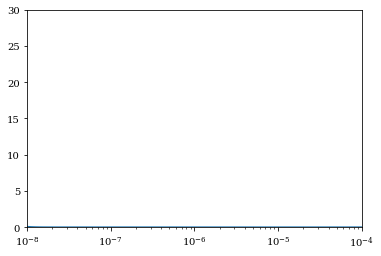

In [ ]:
import matplotlib.pyplot as plt

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 3]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
  #tf.keras.layers.LSTM(128),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(3),
  tf.keras.layers.Lambda(lambda x: x * 200)
])
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
#optimizer = tf.keras.optimizers.Adam(lr=1e-5)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
#history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[lr_schedule])

In [ ]:
history = model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest))

Epoch 1/100
201/201 [==============================] - 3s 16ms/step - loss: 2.4710 - mse: 36.7455 - val_loss: 0.7549 - val_mse: 2.7229
Epoch 2/100
201/201 [==============================] - 2s 11ms/step - loss: 0.8292 - mse: 3.3901 - val_loss: 0.6038 - val_mse: 1.9552
Epoch 3/100
201/201 [==============================] - 3s 13ms/step - loss: 0.6556 - mse: 2.4424 - val_loss: 0.5287 - val_mse: 1.5964
Epoch 4/100
201/201 [==============================] - 2s 11ms/step - loss: 0.5601 - mse: 2.0002 - val_loss: 0.4866 - val_mse: 1.4447
Epoch 5/100
201/201 [==============================] - 2s 11ms/step - loss: 0.5063 - mse: 1.7861 - val_loss: 0.4633 - val_mse: 1.3610
Epoch 6/100
201/201 [==============================] - 2s 11ms/step - loss: 0.4754 - mse: 1.6648 - val_loss: 0.4461 - val_mse: 1.2957
Epoch 7/100
201/201 [==============================] - 2s 11ms/step - loss: 0.4508 - mse: 1.5667 - val_loss: 0.4271 - val_mse: 1.2272
Epoch 8/100
201/201 [==============================] - 3s 13m

In [ ]:
y_pred = model.predict(Xtest)


In [ ]:
y_pred.shape

(1584, 3)

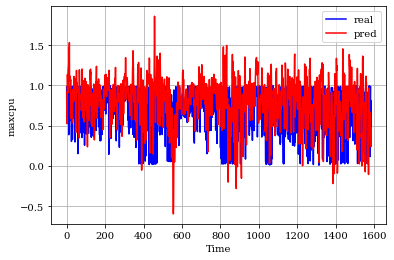

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[:,0], "-b", label="real")
plt.plot(y_pred[:,0], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

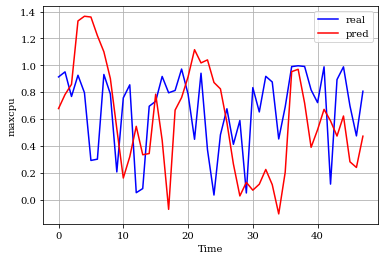

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:,0], "-b", label="real")
plt.plot(y_pred[-48:,0], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

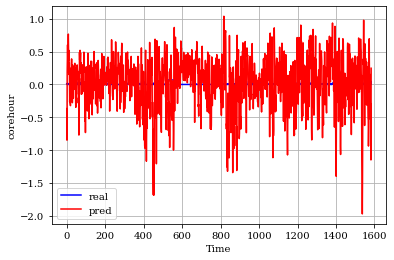

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[:,1], "-b", label="real")
plt.plot(y_pred[:,1], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("corehour")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

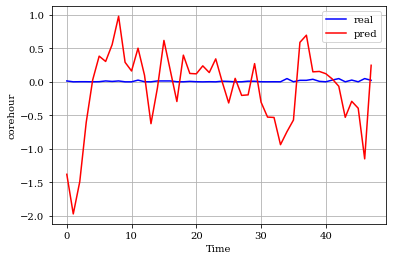

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:,1], "-b", label="real")
plt.plot(y_pred[-48:,1], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("corehour")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

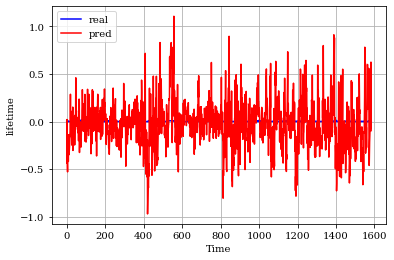

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[:,2], "-b", label="real")
plt.plot(y_pred[:,2], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("lifetime")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()

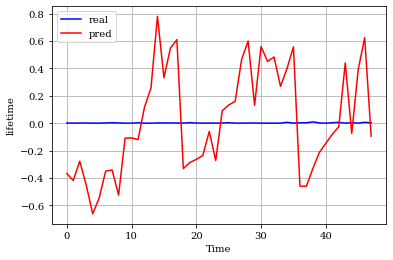

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(ytest[-48:,2], "-b", label="real")
plt.plot(y_pred[-48:,2], "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("lifetime")
plt.savefig('prediction.png', format='png', dpi=720)
plt.show()